In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# sklearn 모델의 동일한 결과 출력을 위해 선언합니다.
np.random.seed(5)

# 데이터 만들기
사람들의 키와 몸무게 데이터를 만들어보도록 하겠습니다.

In [6]:
df = pd.DataFrame(columns=['height', 'weight'])
df.loc[0] = [185,60]
df.loc[1] = [180,60]
df.loc[2] = [185,70]
df.loc[3] = [165,63]
df.loc[4] = [155,68]
df.loc[5] = [170,75]
df.loc[6] = [175,80]

In [7]:
df.head(7)

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68
5,170,75
6,175,80


# 데이터 시각화
데이터를 차트에 시각화합니다.

C:\ProgramData\Anaconda3\envs\tf_cpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


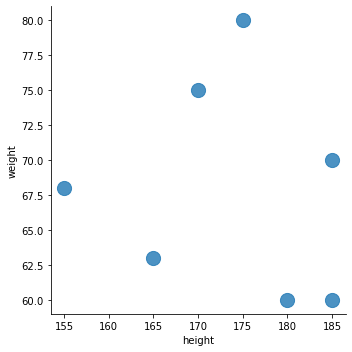

In [8]:
sns.lmplot('height', 'weight', 
           data=df, fit_reg=False, 
           scatter_kws={"s": 200})

# k 평균 군집화
sklearn의 kmean 라이브러리에 데이터를 활용하여, 데이터를 군집화합니다.

In [9]:
data_points = df.values
kmeans = KMeans(n_clusters=3).fit(data_points)

아래 명령어로 각 군집의 중심 위치를 확인할 수 있습니다.

In [10]:
kmeans.cluster_centers_

array([[160.        ,  65.5       ],
       [183.33333333,  63.33333333],
       [172.5       ,  77.5       ]])

데이터가 어느 군집에 소속되어 있는 지 데이터프레임 cluster_id 행에 저장합니다.

In [11]:
df['cluster_id'] = kmeans.labels_

데이터프레임을 조회하여, 데이터별 군집을 확인할 수 있습니다.

In [12]:
df.head(12)

,height,weight,cluster_id
0,185,60,1
1,180,60,1
2,185,70,1
3,165,63,0
4,155,68,0
5,170,75,2
6,175,80,2


# k 평균 군집 시각화
군집 결과를 seaborn과 dataframe을 활용하여 손쉽게 시각화 할 수 있습니다.  
키가 작은 그룹, 중간 그룹, 큰 그룹으로 군집된 결과를 각기 다른 색으로 구분된 군집으로 확인 할 수 있습니다.

C:\ProgramData\Anaconda3\envs\tf_cpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


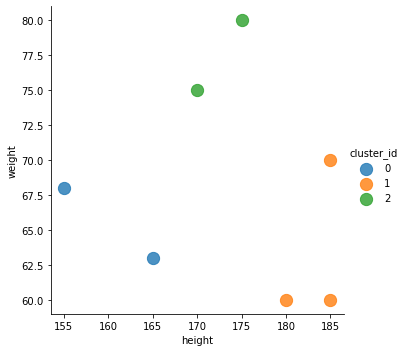

In [13]:
sns.lmplot('height', 'weight', data=df, fit_reg=False,
           scatter_kws={"s": 150},
           hue="cluster_id")